# [In All Likelihood; Yudi Pawitan 2001](https://www.amazon.com/All-Likelihood-Statistical-Modelling-Inference/dp/0199671222)

In [22]:
import time
import math
import torch
import numpy
from scipy.stats import norm
import matplotlib.pyplot as plt

%matplotlib inline

# Likelihood interval and confidence interval

According to Pawitan (page 35), "a likelihood interval is defined as a set of parameter values with high enough likleihood for some cutoff point ___c___ where $\large\frac{L(\theta)}{L(\hat{\theta})}$ is the normalised likleihood". ___C___ does not refer to anything observable (page 36). Fisher maintained that whenever possible we should use probability-based inference (page 36). "Fisher was clear, however, that the likelihood on its own provides only a weaker form of inference than probability-based inference" (page 37). "Unlike the confidence interval, a pure likelihood interval does not have a
repeated sampling interpretation; i.e. it is silent regarding its long-term
properties if the experiment is repeated a large number of times. These
long-term properties provide a (potential) external validity to probability based
confidence intervals." 

"It is well known that generally a confidence level does not actually apply
to an observed interval, as it only makes sense in the long run. If we think
of an interval as a guess of where θ is, a 95% probability of being correct
does not apply to a particular guess. (In contrast, the sense of uncertainty
provided by the likelihood does apply to a particular guess.)" Page 38.

"regularity conditions for asymptotic normality of the estimates". Just wanted to write it here!

Since in this problem we are dealing with estimating the mean parameter, $\mu$, of a normal distribution and we know that mean estimator follows an exact normal distribution and as we observed above there is a very good match between the log likelihood ration and the quadratic approximation then it is best to use a confidence interval rather than a pure likelihood interval! According to page 41 of Pawitan, the exact $95\%$ CI for $\mu$ is given as follows (note that $\theta$ has been replaced with $\mu$):

$\hat{\mu} \pm 1.96 I(\hat{\mu})^{\large\frac{-1}{2}}$

Note that the observed Fisher information for the mean parameter of a normal distribution is given on page 32 (Pawitan) or you could take derivative of the likelihood equation twice with respect to $\mu$. That is 

$I(\hat{\mu}) = \large\frac{n}{\large\hat{\sigma}^2}$.

Finally, with $n = 90$ and $\hat{\sigma}^2 = $ ___sigma_max___ $= 0.0181$ the exact $95\%$ CI for $\mu$ is:

$\hat{\mu} \pm 0.027 = -0.041 \pm 0.027.$

where $-0.041$ is the value of $\mu$ at which the profile likelihood peaks.

In [2]:
index  = numpy.array([8.34, 6.41, 3.41, 3.83, 2.57, 11.64, 1.25, 2.49, 1.62])
cancer = numpy.array([210.3, 177.9, 129.9, 162.2, 130.1, 207.5, 113.5, 147.1, 137.5])

In [24]:
def regression_profile_likelihood(y_data, x_data, beta_data):
    
    n      = x_data.size
    x_mean = x_data.mean()
    beta_one_list = []
    for b_one in beta_data:

        beta_value = -(n/2) - (n/2)*numpy.log((2*numpy.pi/n)*((y_data - (((y_data - \
                            b_one*(x_data - x_mean)).sum())/n + b_one*(x_data - x_mean)))**2).sum())

        # We want likelihood not log-likelihood
        beta_one_list.append(numpy.exp(beta_value))
    
    return numpy.array(beta_one_list)

In [25]:
beta_range       = numpy.linspace(5, 13, 1000)
beta_one_profile = regression_profile_likelihood(cancer, index, beta_range)

Text(0.5, 1.0, 'profile likelihood of $\\beta_1$')

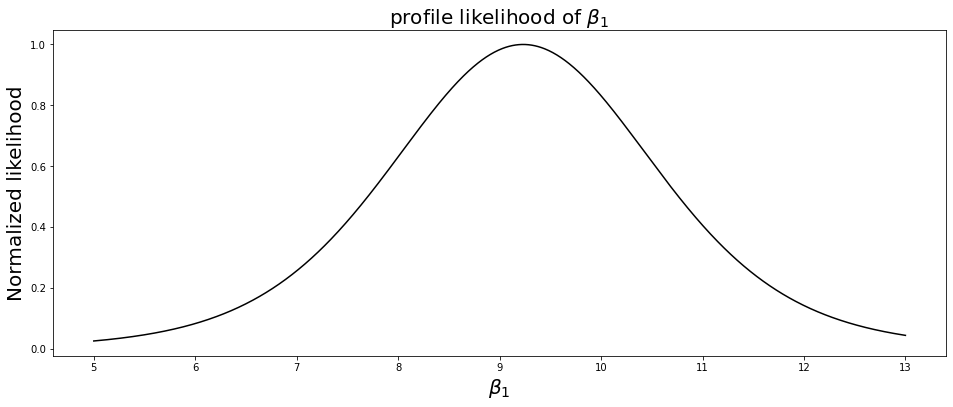

In [60]:
fig, ax = plt.subplots(1, 1, figsize = (16, 6))

ax.plot(beta_range, beta_one_profile/beta_one_profile.max(), 'k-')

ax.set_xlabel(r"$\beta_1$", fontsize = 20)

ax.set_ylabel("Normalized likelihood", fontsize = 20)

ax.set_title(r"profile likelihood of $\beta_1$", fontsize = 20)


In [28]:
beta_range[numpy.argmax(beta_one_profile)]

9.236236236236236

In [48]:
def regression_profile_likelihood_for_hessian(model_param, y_data = torch.from_numpy(cancer), \
                                              x_data = torch.from_numpy(index), n = 9, x_mean = torch.from_numpy(index).mean()):


    beta_value = -(n/2) - (n/2)*torch.log((2*torch.pi/n)*((y_data - (((y_data - \
                            model_param*(x_data - x_mean)).sum())/n + model_param*(x_data - x_mean)))**2).sum())

    return beta_value

In [49]:
parameter_array = torch.Tensor([9.23])
torch.autograd.functional.hessian(regression_profile_likelihood_for_hessian, (parameter_array))

tensor([[-0.6399]])

In [78]:
def regression_profile_likelihood_for_hessian_v2(model_param, y_data = torch.from_numpy(cancer), \
                                              x_data = torch.from_numpy(index), \
                                              x_mean = torch.from_numpy(index).mean(), \
                                              sigma  = torch.from_numpy(index).std()**2, beta_null = 157.33):
    
    beta_value_v2 = -(1/(2*sigma)) * ((y_data - (beta_null + model_param * (x_data - x_mean))) ** 2).sum()
    
    return beta_value_v2

In [79]:
parameter_array = torch.Tensor([9.23])
torch.autograd.functional.hessian(regression_profile_likelihood_for_hessian_v2, (parameter_array))

tensor([[-8.]])

## Example 6.3 (failed to reproduce the profile likelihood plot (fig. 6.3.c))

In [91]:
ex_6_3 = numpy.array([
[50, 0], [61, 0],
[50, 0], [61, 1],
[51, 0], [61, 1],
[51, 0], [62, 1],
[53, 0], [62, 1],
[54, 0], [62, 0],
[54, 0], [62, 1],
[54, 0], [63, 0],
[55, 0], [63, 0],
[55, 0], [63, 1],
[56, 0], [64, 0],
[56, 0], [64, 1],
[56, 0], [65, 0],
[57, 1], [67, 1],
[57, 1], [67, 1],
[57, 0], [68, 0],
[57, 0], [68, 1],
[58, 0], [69, 0],
[59, 1], [70, 1],
[60, 0], [71, 0]])

In [119]:
patient = numpy.array(range(1, 41))
age     = ex_6_3[:, 0]
y_i     = ex_6_3[:, 1] + 10

In [120]:
def beta_one_profile_likelihood_example_6_3(y_data, x_data, beta_data):
        
    beta_profile_list = []
    for beta_value in beta_data:
        beta_profile  = (((numpy.log(y_data/(1-y_data)) - beta_value*x_data).sum() + beta_value*x_data)*y_data - \
                        numpy.log(1 + numpy.exp((numpy.log(y_data/(1-y_data)) - beta_value*x_data).sum() + \
                                  beta_value*x_data))).sum()
        
        beta_profile_list.append(beta_profile)
        
    return numpy.array(beta_profile_list)

In [121]:
beta_range_example_6_3       = numpy.linspace(-1, 1, 1000)
beta_one_profile_example_6_3 = beta_one_profile_likelihood_example_6_3(y_i, age, beta_range_example_6_3)


/tmp/ipykernel_2654488/3211182290.py:5: RuntimeWarning: invalid value encountered in log
  beta_profile = (((numpy.log(y_data/(1-y_data)) - beta_value*x_data).sum() + beta_value*x_data)*y_data - \
/tmp/ipykernel_2654488/3211182290.py:6: RuntimeWarning: invalid value encountered in log
  numpy.log(1 + numpy.exp((numpy.log(y_data/(1-y_data)) - beta_value*x_data).sum() + \


Text(0.5, 1.0, 'profile likelihood of $\\beta_1$')

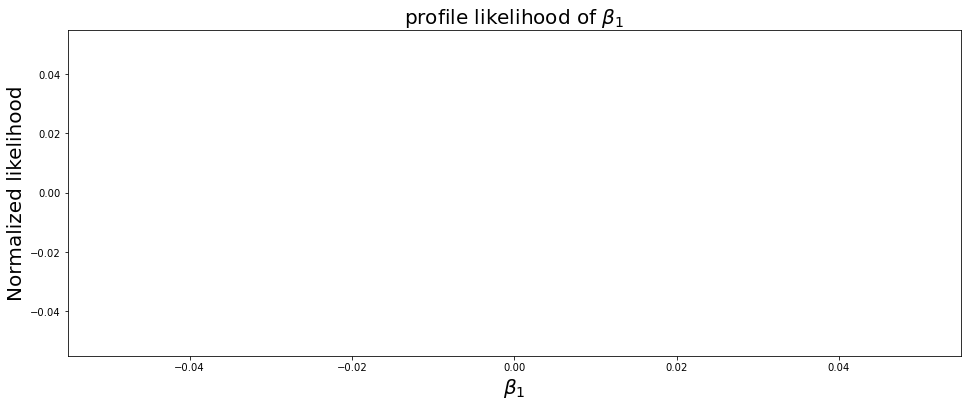

In [103]:
fig, ax = plt.subplots(1, 1, figsize = (16, 6))

ax.plot(beta_range, beta_one_profile_example_6_3/beta_one_profile_example_6_3.max(), 'k-')

ax.set_xlabel(r"$\beta_1$", fontsize = 20)

ax.set_ylabel("Normalized likelihood", fontsize = 20)

ax.set_title(r"profile likelihood of $\beta_1$", fontsize = 20)


In [95]:
def log_likelihood_6_3(y_data = torch.Tensor(y_i), age_data = torch.Tensor(age), beta_null, beta_one):
    
#     likelihood_list = []
    
    likelihood = ((beta_null + beta_one * age_data) * y_data - torch.log(1 + torch.exp(beta_null + \
                                                    beta_one * age_data))).sum()
    
    return likelihood
    

In [ ]:
parameter_array = 
torch.autograd.functional.jacobian(chi_square, (parameter_array))

## Example 6.5 (profile likelihood of $\beta_1$)

In [3]:
age_example_6_5    = numpy.array([18, 20, 22, 23, 23, 24, 24, 25, 25, 27, 28, 28, 28, 29, \
                               30, 30, 30, 30, 31, 31, 32, 33, 33, 33, 34, 34, 34, \
                               35, 35, 35, 37, 37, 37, 39, 40])

claims_example_6_5 = numpy.array([0, 1, 1, 0, 0, 0, 1, 0, 5, 0, 1, 2, 2, 4, 2, 1, 3, 1, 0, \
                                  3, 4, 2, 0, 1, 2, 3, 0, 1, 2, 1, 2, 5, 1, 2, 4])


In [137]:
def beta_one_profile_likelihood_example_6_5(y_data, x_data, beta_data):
        
    beta_profile_list = []
    const = y_data.sum()
    for beta_value in beta_data:
        term_one = numpy.log(const/(numpy.exp(beta_value*x_data).sum()))
        term_two = numpy.exp(term_one + beta_value * x_data)
        
        beta_profile = (-term_two + y_data*(term_one + beta_value * x_data)).sum()
        
        beta_profile_list.append(numpy.exp(beta_profile))
        
    return numpy.array(beta_profile_list)

In [138]:
beta_range_example_6_5       = numpy.linspace(0.0, 0.2, 1000)
beta_one_profile_example_6_5 = beta_one_profile_likelihood_example_6_5(claims_example_6_5, age_example_6_5, \
                                                                       beta_range_example_6_5)


Text(0.5, 1.0, 'profile likelihood of $\\beta_1$')

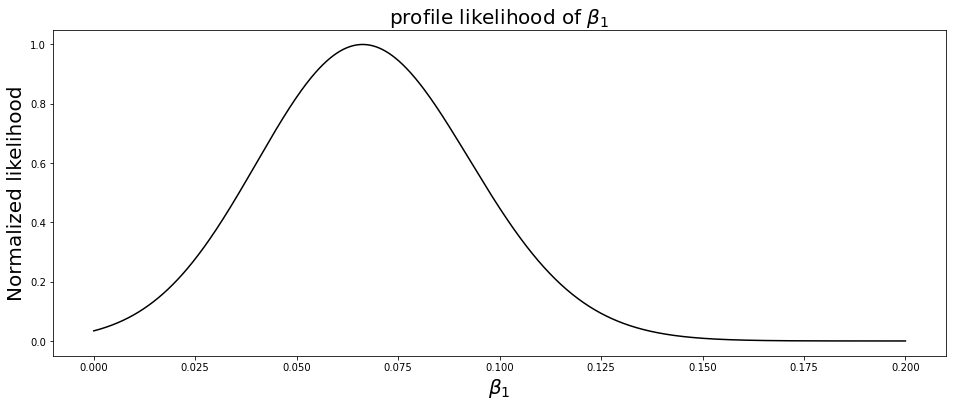

In [139]:
fig, ax = plt.subplots(1, 1, figsize = (16, 6))

ax.plot(beta_range_example_6_5, beta_one_profile_example_6_5/beta_one_profile_example_6_5.max(), 'k-')

ax.set_xlabel(r"$\beta_1$", fontsize = 20)

ax.set_ylabel("Normalized likelihood", fontsize = 20)

ax.set_title(r"profile likelihood of $\beta_1$", fontsize = 20)


In [140]:
beta_range_example_6_5[numpy.argmax(beta_one_profile_example_6_5)]

0.06626626626626626

### Example 6.5 (observed Fisher information of $\beta_1$)

In [161]:
def observed_hessian_matrix_example_6_5(model_param, y_data = torch.Tensor(claims_example_6_5), \
                                              x_data = torch.Tensor(age_example_6_5)):

    const    = y_data.sum()
    term_one = torch.log(const/(torch.exp(model_param*x_data).sum()))
    term_two = torch.exp(term_one + model_param * x_data)
    beta_profile = (-term_two + y_data*(term_one + model_param * x_data)).sum()
        

    return beta_profile

In [166]:
parameter_array_example_6_5 = torch.Tensor([0.066])
torch.autograd.functional.hessian(observed_hessian_matrix_example_6_5, (parameter_array_example_6_5))

tensor([[-1456.2173]])

In [167]:
1/numpy.sqrt(1456.2173)

0.026205165502520576

## Example 6.5 (profile likelihood of $\beta_0$). Failed attempt!!! (the plot below is wrong)!

In [14]:
def beta_null_profile_likelihood_example_6_5(y_data, x_data, beta_data):
        
    beta_profile_list = []
    const = y_data.sum()
    for beta_value in beta_data:
        term_one = ((numpy.log(const) - y_data.size * beta_value)/(numpy.exp(x_data).sum()))
        term_two = numpy.exp(beta_value + term_one * x_data)
        
        beta_profile = (-term_two + y_data*(beta_value + term_one * x_data)).sum()
        
        beta_profile_list.append(numpy.exp(beta_profile))
        
    return numpy.array(beta_profile_list)

In [15]:
beta_null_range_example_6_5   = numpy.linspace(0.0, 1, 1000)
beta_null_profile_example_6_5 = beta_null_profile_likelihood_example_6_5(claims_example_6_5, age_example_6_5, \
                                                                       beta_null_range_example_6_5)


Text(0.5, 1.0, 'profile likelihood of $\\beta_0$')

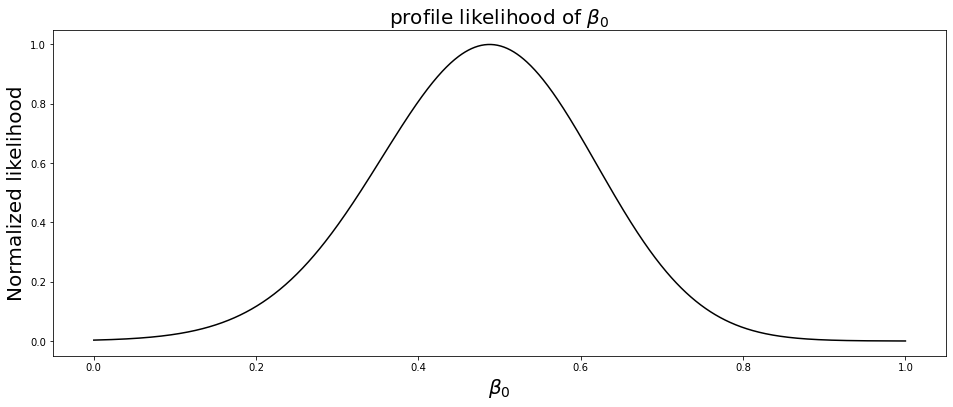

In [16]:
fig, ax = plt.subplots(1, 1, figsize = (16, 6))

ax.plot(beta_null_range_example_6_5, beta_null_profile_example_6_5/beta_null_profile_example_6_5.max(), 'k-')

ax.set_xlabel(r"$\beta_0$", fontsize = 20)

ax.set_ylabel("Normalized likelihood", fontsize = 20)

ax.set_title(r"profile likelihood of $\beta_0$", fontsize = 20)


In [17]:
beta_null_range_example_6_5[numpy.argmax(beta_null_profile_example_6_5)]

0.4874874874874875

## Exaample 6.6 (Failed to reproduce the results.  I am not sure if I understand the solution!)

In [133]:
# years_example_6_6     = numpy.array([9,9,8,8,9,8,9,8,2,2,3,2,2,2,2,3])
# accidents_example_6_6 = numpy.array([13,6,30,20,10,15,7,13,0,2,4,0,0,6,1,2])

years_example_6_6     = numpy.array([2,2,3,2,2,2,2,3])
accidents_example_6_6 = numpy.array([0,2,4,0,0,6,1,2])
factorial_data = []
for i in accidents_example_6_6:
    factorial_data.append(math.factorial(i))
factorial_example_6_6 = numpy.array(factorial_data)

In [211]:
def tau_one_profile_likelihood_example_6_6(y_data, x_data, factorial, tau_data):
    
    n = y_data.size
    tau_profile_list = []
    for tau_value in tau_data:
        lambda_null  = numpy.log(y_data.sum()) - numpy.log((numpy.exp(numpy.log(x_data) + tau_value)).sum()) - numpy.log(n)
        tau_profile  = -n*numpy.exp(numpy.log(x_data) + lambda_null + tau_value).sum() + (y_data * \
                        (numpy.log(x_data) + lambda_null + tau_value)).sum()# - (numpy.log(factorial)).sum()

        tau_profile_list.append(numpy.exp(tau_profile))
    
    return numpy.array(tau_profile_list)

In [212]:
tau_range_example_6_6       = numpy.linspace(-1, 1, 100)
tau_one_profile_example_6_6 = tau_one_profile_likelihood_example_6_6(accidents_example_6_6, years_example_6_6, \
                                                                       factorial_example_6_6, tau_range_example_6_6)


Text(0.5, 1.0, 'profile likelihood of $\\lambda_0$')

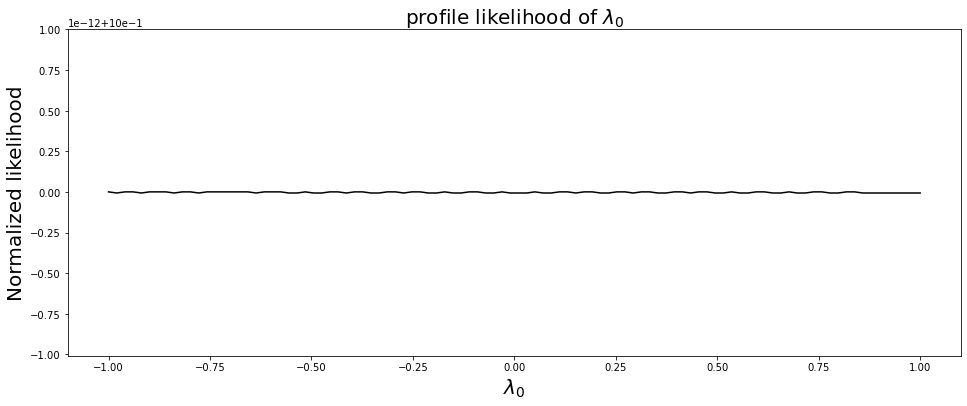

In [213]:
fig, ax = plt.subplots(1, 1, figsize = (16, 6))

ax.plot(tau_range_example_6_6, tau_one_profile_example_6_6/tau_one_profile_example_6_6.max(), 'k-')

ax.set_xlabel(r"$\lambda_0$", fontsize = 20)

ax.set_ylabel("Normalized likelihood", fontsize = 20)

ax.set_title(r"profile likelihood of $\lambda_0$", fontsize = 20)


## Example 6.7 ($\beta_1$ and $\beta_0$ estimation)

In [216]:
density = numpy.array([5, 10, 15, 20, 30, 40, 60, 80, 100])

yield_1  = numpy.array([122.7, 63.0, 32.5, 34.5, 31.4, 17.7, 21.9, 21.3, 18.4])

Text(0, 0.5, '1/Yeild')

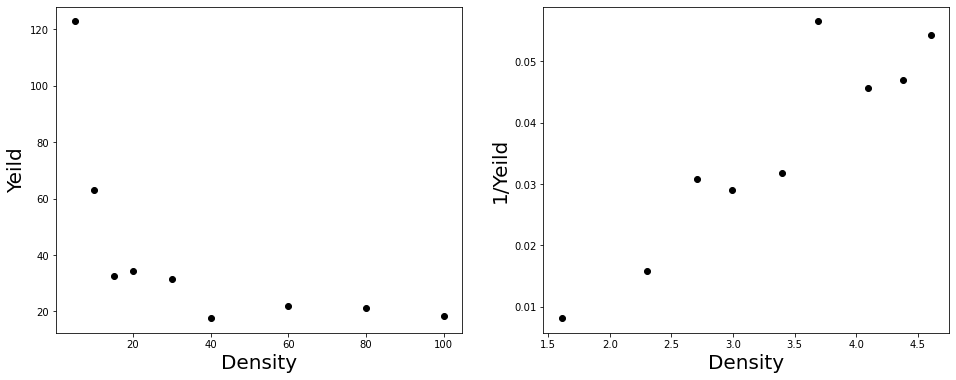

In [236]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6))

ax[0].plot(density, yield_1, 'ok')

ax[1].plot(numpy.log(density), 1/yield_1, 'ok')


ax[0].set_xlabel("Density", fontsize = 20)
ax[0].set_ylabel("Yeild", fontsize = 20)

ax[1].set_xlabel("Density", fontsize = 20)
ax[1].set_ylabel("1/Yeild", fontsize = 20)